## Implementacija KNN algoritma

U ovoj vježbi upoznati ćemo se sa prvim algoritmom strojnog učenja, a to je KNN (K nearest neighbors). Model za kNN je cijeli trening set podataka. Kada je potrebno predviđanje za neviđene primjere podataka, kNN algoritam će tražiti kroz trening skup podataka k-najsličnijih slučajeva, te vratiti predikciju iz trening skupa podataka niz onih koji su najsličniji (ili u ovom slučaju najbliži) neviđenom podatku. 

KNN algoritam je baziran na instanci, što znači da odluke donosi na osnovu pojedinih instanci iz trening skupa podataka. 
Cilj sličnosti je da predstavlja mjeru između instanci podataka što uzrokuje da svaki primjerak podataka se "natječe" ili u biti da budu najsličniji do određenog stupnja neviđenom podatku i time pridonose predviđanju.
KNN je također "lijeni" algoritam zato što ne izgrađuje model dok nam nije potrebno predviđanje. Da ne gubimo puno vremena, preći ćemo na implementaciju ovog algoritma u programskom jeziku Python.

### Rad s podacima

Prvo što ćemo uraditi je poreuzeti datoteku za klasifikaciju vrste cvjeća s interneta, zvanu [iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). Ovu ćemo datoteku otvoriti i ispisati na sljedeći način (ne zaboraviti staviti iris.dataset) u isti direktorij gdje se nalazi python skripta:

In [2]:
import pandas as pd
df = pd.read_csv("iris.data.txt", names=["SetosaLength", "SetosaWidth", "PetalLength", "PetalWidth", "FlowerType"])
df

,SetosaLength,SetosaWidth,PetalLength,PetalWidth,FlowerType
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


FlowerType
Iris-setosa        Axes(0.125,0.125;0.775x0.755)
Iris-versicolor    Axes(0.125,0.125;0.775x0.755)
Iris-virginica     Axes(0.125,0.125;0.775x0.755)
Name: SetosaLength, dtype: object

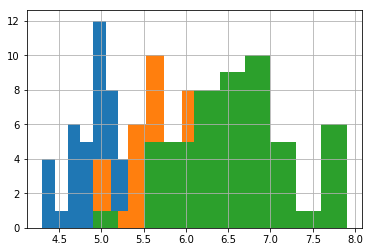

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.groupby("FlowerType").SetosaLength.hist()

Kako bismo ispravno klasificirali cvijeće trebamo podjeliti podatke u podatke za treniranje i podatke za testiranje, također sve numeričke podatke moramo staviti kao jedan niz a njihovu predikciju ostaviti kao string, često u strojnom učenju se i ovaj podatak pretvara u nomnializaciju, no zasada ostaviti ćemo ovako. Napraviti ćemo funkciju koja pravi podatke za treniranje i testiranje.

In [11]:
import csv
import random
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

Ovu funkciju ćemo testirati tako da prosljedimo naziv datoteke u ovom slučaju to je iris.data.txt, u postotcima ćemo prosljediti funkciji odnos trening seta i testing set-a i na kraju u niz trainingSet i testSet učitati podatke.

In [12]:
trainingSet=[]
testSet=[]
loadDataset('iris.data.txt', 0.66, trainingSet, testSet)
print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)))

Train: 101
Test: 49


In [17]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [18]:
data1 = [2, 2, 2, 2, 'a']
data2 = [4, 4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 4)
print('Udaljenost: ' + repr(distance))

Udaljenost: 4.0


In [21]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [22]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [23]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [24]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


In [49]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1    
    return (correct/float(len(testSet))) * 100.0

In [50]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [51]:
split = 0.67
testSet = []
loadDataset('iris.data.txt', split, trainingSet, testSet)
print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
accuracy = getAccuracy(testSet, predictions)
accuracy

Train set: 1570
Test set: 54
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> p

100.0